In [1]:
import os
import shutil

import numpy as np
import tensorflow as tf

2023-03-18 22:06:10.878155: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-18 22:06:10.974088: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
import tensorflow as tf
import random
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  4


In [3]:
import os
os.getcwd()

'/home/yang'

In [4]:
os.chdir('Train')
os.getcwd()

'/home/yang/Train'

In [5]:
!find . -name ".ipynb_checkpoints" -print -delete
!find . -name ".DS_Store" -print -delete

In [6]:
import cv2

# Load video
video_path = "videos/00000.mp4"
cap = cv2.VideoCapture(video_path)

# Get total number of frames
num_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Get shape of each frame
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Print results
print("Total number of frames:", num_frames)
print("Frame shape:", (frame_width, frame_height))


Total number of frames: 315
Frame shape: (640, 480)


In [6]:
import os

folder_path = 'videos'  # set the path to the videos folder

count = 0
for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.endswith('.mp4') or file.endswith('.avi') or file.endswith('.mov'):
            count += 1

print(f"Total number of video files under '{folder_path}' folder: {count}")


Total number of video files under 'videos' folder: 15605


In [8]:
import os
import cv2
import random
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm

VIDEO_PATH = "videos"
FRAME_PATH = "frames"

def extract_frames(video_file):
    # Open Video File
    video_capture = cv2.VideoCapture(os.path.join(VIDEO_PATH, video_file))

    # Calculate total frames in video
    total_frames = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))

    # Choose 32 random frames to extract
    index_arr = [i for i in range(total_frames)]
    index_arr = sorted(random.sample(index_arr, k=32))

    frame_count = 0
    for frame_index in range(total_frames):
        ret, frame = video_capture.read()

        if ret:
            # Save frame only if its index is in index_arr
            if frame_index in index_arr:
                img_number = str(frame_count).zfill(5)
                name = os.path.join(FRAME_PATH, f"{video_file.split('.')[0]}_frame_{img_number}.jpg")
                cv2.imwrite(name, frame)
                frame_count += 1

                # Remove the index from index_arr so that each index is used only once
                index_arr.remove(frame_index)

                # Exit loop after all required frames have been saved
                if frame_count == 32:
                    break
        else:
            break

    video_capture.release()

# Iterate over video files
video_files = os.listdir(VIDEO_PATH)
with ThreadPoolExecutor() as executor:
    futures = []
    for video_file in video_files:
        futures.append(executor.submit(extract_frames, video_file))
    for future in tqdm(futures):
        future.result()






100%|█████████████████████████████████████| 15605/15605 [27:42<00:00,  9.39it/s]


In [7]:
import os
import cv2

FRAME_PATH = "frames"

# count number of image files in frames directory
total_frames = 0
for file_name in os.listdir(FRAME_PATH):
    if file_name.endswith(".jpg"):
        total_frames += 1

print(f"Total frames: {total_frames}")

# 15605*32 = 499360

Total frames: 499360


In [8]:
import os

FRAME_PATH = "frames"

# create a dictionary to store the number of frames for each video file
video_frames = {}

# iterate over all files in the frames directory
for file_name in os.listdir(FRAME_PATH):
    if file_name.endswith(".jpg"):
        # extract the video file name from the image file name
        video_file = file_name.split("_frame_")[0] + ".mp4"
        # increment the frame count for the video file
        if video_file in video_frames:
            video_frames[video_file] += 1
        else:
            video_frames[video_file] = 1

# check which video files have fewer than 32 frames
for video_file, frame_count in video_frames.items():
    if frame_count < 32:
        print(f"Video file {video_file} has only {frame_count} frames.")
    elif frame_count > 32:
        print(f"Video file {video_file} has more than 32 frames.")



2023-03-18 07:44:34.625906: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38214 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:00:04.0, compute capability: 8.0
2023-03-18 07:44:34.628486: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 38214 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:00:05.0, compute capability: 8.0
2023-03-18 07:44:34.630086: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 38214 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:00:06.0, compute capability: 8.0
2023-03-18 07:44:34.632030: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 38214 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bu

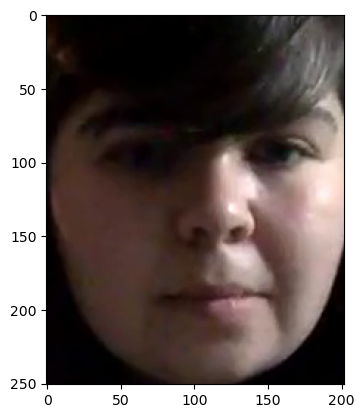

In [11]:
from retinaface import RetinaFace
from PIL import Image
import matplotlib.pyplot as plt
# Load RetinaFace detector

# Load the original image
img_path = "frames/00000_frame_00000.jpg"
img = Image.open(img_path)

# Extract the face from the image using RetinaFace
faces = RetinaFace.extract_faces(img_path=img_path, align=False)

# Display the extracted face
if faces:
    face_img = Image.fromarray(faces[0])
    plt.imshow(face_img)
else:
    print("No face detected in the image.")

# Load the image

In [12]:
faces[0].shape

(251, 202, 3)

In [9]:
# Get list of all frame paths
frame_paths = sorted([os.path.join("frames", filename) for filename in os.listdir("frames")])
print(frame_paths[0:32])

['frames/00000_frame_00000.jpg', 'frames/00000_frame_00001.jpg', 'frames/00000_frame_00002.jpg', 'frames/00000_frame_00003.jpg', 'frames/00000_frame_00004.jpg', 'frames/00000_frame_00005.jpg', 'frames/00000_frame_00006.jpg', 'frames/00000_frame_00007.jpg', 'frames/00000_frame_00008.jpg', 'frames/00000_frame_00009.jpg', 'frames/00000_frame_00010.jpg', 'frames/00000_frame_00011.jpg', 'frames/00000_frame_00012.jpg', 'frames/00000_frame_00013.jpg', 'frames/00000_frame_00014.jpg', 'frames/00000_frame_00015.jpg', 'frames/00000_frame_00016.jpg', 'frames/00000_frame_00017.jpg', 'frames/00000_frame_00018.jpg', 'frames/00000_frame_00019.jpg', 'frames/00000_frame_00020.jpg', 'frames/00000_frame_00021.jpg', 'frames/00000_frame_00022.jpg', 'frames/00000_frame_00023.jpg', 'frames/00000_frame_00024.jpg', 'frames/00000_frame_00025.jpg', 'frames/00000_frame_00026.jpg', 'frames/00000_frame_00027.jpg', 'frames/00000_frame_00028.jpg', 'frames/00000_frame_00029.jpg', 'frames/00000_frame_00030.jpg', 'frames

In [10]:
frame_groups = [frame_paths[i:i+32] for i in range(0, len(frame_paths), 32)]
print(frame_groups[:2])


[['frames/00000_frame_00000.jpg', 'frames/00000_frame_00001.jpg', 'frames/00000_frame_00002.jpg', 'frames/00000_frame_00003.jpg', 'frames/00000_frame_00004.jpg', 'frames/00000_frame_00005.jpg', 'frames/00000_frame_00006.jpg', 'frames/00000_frame_00007.jpg', 'frames/00000_frame_00008.jpg', 'frames/00000_frame_00009.jpg', 'frames/00000_frame_00010.jpg', 'frames/00000_frame_00011.jpg', 'frames/00000_frame_00012.jpg', 'frames/00000_frame_00013.jpg', 'frames/00000_frame_00014.jpg', 'frames/00000_frame_00015.jpg', 'frames/00000_frame_00016.jpg', 'frames/00000_frame_00017.jpg', 'frames/00000_frame_00018.jpg', 'frames/00000_frame_00019.jpg', 'frames/00000_frame_00020.jpg', 'frames/00000_frame_00021.jpg', 'frames/00000_frame_00022.jpg', 'frames/00000_frame_00023.jpg', 'frames/00000_frame_00024.jpg', 'frames/00000_frame_00025.jpg', 'frames/00000_frame_00026.jpg', 'frames/00000_frame_00027.jpg', 'frames/00000_frame_00028.jpg', 'frames/00000_frame_00029.jpg', 'frames/00000_frame_00030.jpg', 'frame

In [15]:
from retinaface import RetinaFace
from PIL import Image
import os
import gc
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm
# Define function to extract face from frame
def extract_face(frame_path, face_locations, no_face_files):
    # Load the original image
    img = Image.open(frame_path)

    # Extract the face from the image using RetinaFace
    faces = RetinaFace.extract_faces(img_path=frame_path, align=False)

    # If no face detected, add the frame to the list of frames without a face
    if not faces:
        print(f"No face detected in frame: {frame_path}")
        no_face_files.append(frame_path)

        # If this is the first frame in the group, store the location of the previous face
        if not face_locations:
            print(f"No face detected in the first frame of the group: {frame_path}")
            return None
        else:
            facial_area = face_locations[0]
    else:
        # If face detected, save the extracted face and update the facial area
        face_img = Image.fromarray(faces[0])
        save_path = f"crop_frames/{os.path.basename(frame_path)}"
        face_img.save(save_path)
        facial_area = RetinaFace.detect_faces(img_path=frame_path)['face_1']['facial_area']
        face_locations.insert(0, facial_area)


    return facial_area

# Define function to extract faces from all frames in a group
def extract_faces_from_group(group):
    # Keep track of the facial area in the first frame
    face_locations = []

    # Keep track of frames without a face
    no_face_files = []

    # Extract faces from each frame in the group
    for frame_path in group:
        facial_area = extract_face(frame_path, face_locations, no_face_files)


    for file_path in no_face_files:
        img = Image.open(file_path)
        cropped_img = img.crop((face_locations[0][0], face_locations[0][1], face_locations[0][2], face_locations[0][3]))
        cropped_img.save(f"crop_frames/{os.path.basename(file_path)}")
        print(f"{file_path} has been cropped")
        img.close()
        cropped_img.close()

    # Release memory
    gc.collect()

    # Clean the face_locations and no_face_files lists before processing the next group
    face_locations.clear()
    no_face_files.clear()

    return None

# Define function to extract faces from all frames
def extract_faces(frame_groups):
    # Create directory to store output images if it does not exist
    if not os.path.exists("crop_frames"):
        os.mkdir("crop_frames")

    # Extract faces from each group of frames
    with ThreadPoolExecutor() as executor:
        extract_func = extract_faces_from_group
        futures = []
        for group in frame_groups:
            future = executor.submit(extract_func, group)
            futures.append(future)
            
        for future in tqdm(futures):
            result = future.result()

    return None


In [16]:
extract_faces(frame_groups)
print("Done!")

  1%|▎                                    | 126/15605 [04:28<3:06:16,  1.39it/s]

No face detected in frame: frames/00135_frame_00009.jpg
No face detected in frame: frames/00135_frame_00012.jpg
No face detected in frame: frames/00135_frame_00023.jpg
No face detected in frame: frames/00135_frame_00024.jpg
No face detected in frame: frames/00135_frame_00025.jpg
No face detected in frame: frames/00135_frame_00027.jpg
No face detected in frame: frames/00135_frame_00028.jpg


  1%|▎                                   | 127/15605 [04:47<21:13:15,  4.94s/it]

No face detected in frame: frames/00135_frame_00029.jpg


  1%|▎                                   | 128/15605 [04:48<16:51:12,  3.92s/it]

No face detected in frame: frames/00135_frame_00030.jpg


  1%|▎                                   | 129/15605 [04:49<13:28:28,  3.13s/it]

frames/00135_frame_00009.jpg has been cropped
frames/00135_frame_00012.jpg has been cropped
frames/00135_frame_00023.jpg has been cropped
frames/00135_frame_00024.jpg has been cropped
frames/00135_frame_00025.jpg has been cropped
frames/00135_frame_00027.jpg has been cropped
frames/00135_frame_00028.jpg has been cropped
frames/00135_frame_00029.jpg has been cropped
frames/00135_frame_00030.jpg has been cropped


  1%|▎                                    | 140/15605 [04:57<2:31:02,  1.71it/s]

No face detected in frame: frames/00144_frame_00024.jpg


  1%|▎                                   | 143/15605 [05:19<13:56:28,  3.25s/it]

frames/00144_frame_00024.jpg has been cropped


  1%|▎                                    | 149/15605 [05:24<5:08:49,  1.20s/it]

No face detected in frame: frames/00154_frame_00011.jpg


  1%|▎                                   | 155/15605 [05:45<12:33:00,  2.92s/it]

frames/00154_frame_00011.jpg has been cropped


  1%|▍                                    | 182/15605 [06:29<5:38:58,  1.32s/it]

No face detected in frame: frames/00195_frame_00000.jpg
No face detected in the first frame of the group: frames/00195_frame_00000.jpg
No face detected in frame: frames/00195_frame_00001.jpg
No face detected in the first frame of the group: frames/00195_frame_00001.jpg
No face detected in frame: frames/00195_frame_00003.jpg
No face detected in frame: frames/00195_frame_00004.jpg
No face detected in frame: frames/00195_frame_00005.jpg
No face detected in frame: frames/00195_frame_00006.jpg
No face detected in frame: frames/00195_frame_00007.jpg
No face detected in frame: frames/00195_frame_00008.jpg
No face detected in frame: frames/00195_frame_00009.jpg
No face detected in frame: frames/00195_frame_00010.jpg
No face detected in frame: frames/00195_frame_00011.jpg
No face detected in frame: frames/00195_frame_00012.jpg
No face detected in frame: frames/00195_frame_00013.jpg
No face detected in frame: frames/00195_frame_00014.jpg
No face detected in frame: frames/00195_frame_00015.jpg
No

  1%|▍                                   | 183/15605 [06:43<19:46:40,  4.62s/it]

No face detected in frame: frames/00195_frame_00031.jpg
frames/00195_frame_00000.jpg has been cropped
frames/00195_frame_00001.jpg has been cropped
frames/00195_frame_00003.jpg has been cropped
frames/00195_frame_00004.jpg has been cropped
frames/00195_frame_00005.jpg has been cropped
frames/00195_frame_00006.jpg has been cropped
frames/00195_frame_00007.jpg has been cropped
frames/00195_frame_00008.jpg has been cropped
frames/00195_frame_00009.jpg has been cropped
frames/00195_frame_00010.jpg has been cropped
frames/00195_frame_00011.jpg has been cropped
frames/00195_frame_00012.jpg has been cropped
frames/00195_frame_00013.jpg has been cropped
frames/00195_frame_00014.jpg has been cropped
frames/00195_frame_00015.jpg has been cropped
frames/00195_frame_00016.jpg has been cropped
frames/00195_frame_00017.jpg has been cropped
frames/00195_frame_00018.jpg has been cropped
frames/00195_frame_00019.jpg has been cropped
frames/00195_frame_00020.jpg has been cropped
frames/00195_frame_00021

  1%|▍                                   | 197/15605 [07:13<16:56:34,  3.96s/it]

No face detected in frame: frames/00204_frame_00030.jpg


  1%|▍                                   | 198/15605 [07:19<18:23:37,  4.30s/it]

frames/00204_frame_00030.jpg has been cropped


  1%|▌                                    | 224/15605 [07:55<4:45:49,  1.11s/it]

No face detected in frame: frames/00230_frame_00009.jpg


  1%|▌                                   | 227/15605 [08:13<13:39:32,  3.20s/it]

frames/00230_frame_00009.jpg has been cropped


  2%|▌                                    | 252/15605 [08:55<5:35:41,  1.31s/it]

No face detected in frame: frames/00256_frame_00028.jpg


  2%|▌                                   | 253/15605 [09:10<17:58:50,  4.22s/it]

No face detected in frame: frames/00256_frame_00029.jpg


  2%|▌                                   | 254/15605 [09:10<14:09:19,  3.32s/it]

No face detected in frame: frames/00256_frame_00030.jpg
frames/00256_frame_00028.jpg has been cropped
frames/00256_frame_00029.jpg has been cropped
frames/00256_frame_00030.jpg has been cropped


  2%|▋                                    | 305/15605 [10:46<6:29:20,  1.53s/it]

No face detected in frame: frames/00306_frame_00030.jpg
No face detected in frame: frames/00306_frame_00031.jpg
frames/00306_frame_00030.jpg has been cropped
frames/00306_frame_00031.jpg has been cropped


  2%|▊                                    | 322/15605 [11:21<7:31:36,  1.77s/it]

No face detected in frame: frames/00335_frame_00007.jpg
No face detected in frame: frames/00335_frame_00008.jpg
No face detected in frame: frames/00335_frame_00009.jpg
No face detected in frame: frames/00335_frame_00010.jpg


  2%|▊                                    | 335/15605 [11:48<6:37:34,  1.56s/it]

frames/00335_frame_00007.jpg has been cropped
frames/00335_frame_00008.jpg has been cropped
frames/00335_frame_00009.jpg has been cropped
frames/00335_frame_00010.jpg has been cropped


  2%|▉                                    | 374/15605 [13:06<4:31:03,  1.07s/it]

No face detected in frame: frames/00387_frame_00000.jpg
No face detected in the first frame of the group: frames/00387_frame_00000.jpg


  2%|▉                                    | 388/15605 [13:35<4:50:21,  1.14s/it]

frames/00387_frame_00000.jpg has been cropped


  3%|▉                                    | 406/15605 [14:14<7:23:40,  1.75s/it]

No face detected in frame: frames/00406_frame_00026.jpg


  3%|▉                                   | 407/15605 [14:24<18:04:07,  4.28s/it]

frames/00406_frame_00026.jpg has been cropped


  3%|█                                    | 445/15605 [15:32<5:09:25,  1.22s/it]

No face detected in frame: frames/00455_frame_00004.jpg
No face detected in frame: frames/00455_frame_00005.jpg
No face detected in frame: frames/00455_frame_00006.jpg
No face detected in frame: frames/00455_frame_00007.jpg
No face detected in frame: frames/00455_frame_00008.jpg
No face detected in frame: frames/00455_frame_00009.jpg
No face detected in frame: frames/00455_frame_00010.jpg
No face detected in frame: frames/00455_frame_00011.jpg


  3%|█                                    | 446/15605 [15:36<8:49:13,  2.09s/it]

No face detected in frame: frames/00455_frame_00012.jpg
No face detected in frame: frames/00455_frame_00013.jpg


  3%|█                                   | 450/15605 [15:51<13:49:37,  3.28s/it]

frames/00455_frame_00004.jpg has been cropped
frames/00455_frame_00005.jpg has been cropped
frames/00455_frame_00006.jpg has been cropped
frames/00455_frame_00007.jpg has been cropped
frames/00455_frame_00008.jpg has been cropped
frames/00455_frame_00009.jpg has been cropped
frames/00455_frame_00010.jpg has been cropped
frames/00455_frame_00011.jpg has been cropped
frames/00455_frame_00012.jpg has been cropped
frames/00455_frame_00013.jpg has been cropped


  3%|█▏                                  | 489/15605 [17:05<10:09:44,  2.42s/it]

No face detected in frame: frames/00497_frame_00014.jpg


  3%|█▏                                   | 496/15605 [17:21<6:09:03,  1.47s/it]

frames/00497_frame_00014.jpg has been cropped


  4%|█▎                                  | 560/15605 [19:33<12:28:41,  2.99s/it]

No face detected in frame: frames/00570_frame_00017.jpg
No face detected in frame: frames/00570_frame_00018.jpg
No face detected in frame: frames/00570_frame_00019.jpg
No face detected in frame: frames/00570_frame_00020.jpg
No face detected in frame: frames/00570_frame_00021.jpg


  4%|█▎                                   | 565/15605 [19:43<7:08:19,  1.71s/it]

No face detected in frame: frames/00570_frame_00027.jpg


  4%|█▎                                   | 566/15605 [19:44<5:56:20,  1.42s/it]

No face detected in frame: frames/00570_frame_00028.jpg


  4%|█▎                                   | 568/15605 [19:46<5:41:15,  1.36s/it]

frames/00570_frame_00017.jpg has been cropped
frames/00570_frame_00018.jpg has been cropped
frames/00570_frame_00019.jpg has been cropped
frames/00570_frame_00020.jpg has been cropped
frames/00570_frame_00021.jpg has been cropped
frames/00570_frame_00027.jpg has been cropped
frames/00570_frame_00028.jpg has been cropped


  4%|█▎                                  | 577/15605 [20:10<10:06:42,  2.42s/it]

No face detected in frame: frames/00590_frame_00000.jpg
No face detected in the first frame of the group: frames/00590_frame_00000.jpg
No face detected in frame: frames/00590_frame_00001.jpg
No face detected in the first frame of the group: frames/00590_frame_00001.jpg


  4%|█▎                                   | 578/15605 [20:11<8:37:28,  2.07s/it]

No face detected in frame: frames/00590_frame_00002.jpg
No face detected in the first frame of the group: frames/00590_frame_00002.jpg
No face detected in frame: frames/00590_frame_00003.jpg
No face detected in the first frame of the group: frames/00590_frame_00003.jpg


  4%|█▎                                   | 579/15605 [20:12<7:12:36,  1.73s/it]

No face detected in frame: frames/00590_frame_00004.jpg
No face detected in the first frame of the group: frames/00590_frame_00004.jpg
No face detected in frame: frames/00592_frame_00000.jpg
No face detected in the first frame of the group: frames/00592_frame_00000.jpg
No face detected in frame: frames/00590_frame_00005.jpg
No face detected in the first frame of the group: frames/00590_frame_00005.jpg


  4%|█▍                                   | 580/15605 [20:13<6:23:08,  1.53s/it]

No face detected in frame: frames/00592_frame_00001.jpg
No face detected in the first frame of the group: frames/00592_frame_00001.jpg
No face detected in frame: frames/00590_frame_00006.jpg
No face detected in the first frame of the group: frames/00590_frame_00006.jpg
No face detected in frame: frames/00592_frame_00002.jpg
No face detected in the first frame of the group: frames/00592_frame_00002.jpg
No face detected in frame: frames/00590_frame_00007.jpg
No face detected in the first frame of the group: frames/00590_frame_00007.jpg


  4%|█▍                                   | 581/15605 [20:14<5:35:08,  1.34s/it]

No face detected in frame: frames/00592_frame_00003.jpg
No face detected in the first frame of the group: frames/00592_frame_00003.jpg
No face detected in frame: frames/00590_frame_00008.jpg
No face detected in the first frame of the group: frames/00590_frame_00008.jpg
No face detected in frame: frames/00592_frame_00004.jpg
No face detected in the first frame of the group: frames/00592_frame_00004.jpg
No face detected in frame: frames/00590_frame_00009.jpg
No face detected in the first frame of the group: frames/00590_frame_00009.jpg
No face detected in frame: frames/00592_frame_00005.jpg
No face detected in the first frame of the group: frames/00592_frame_00005.jpg
No face detected in frame: frames/00590_frame_00010.jpg
No face detected in the first frame of the group: frames/00590_frame_00010.jpg


  4%|█▍                                   | 582/15605 [20:15<5:32:05,  1.33s/it]

No face detected in frame: frames/00592_frame_00006.jpg
No face detected in the first frame of the group: frames/00592_frame_00006.jpg
No face detected in frame: frames/00590_frame_00011.jpg
No face detected in the first frame of the group: frames/00590_frame_00011.jpg
No face detected in frame: frames/00592_frame_00007.jpg
No face detected in the first frame of the group: frames/00592_frame_00007.jpg
No face detected in frame: frames/00590_frame_00012.jpg
No face detected in the first frame of the group: frames/00590_frame_00012.jpg


  4%|█▍                                   | 583/15605 [20:16<5:13:15,  1.25s/it]

No face detected in frame: frames/00592_frame_00008.jpg
No face detected in the first frame of the group: frames/00592_frame_00008.jpg
No face detected in frame: frames/00590_frame_00013.jpg
No face detected in the first frame of the group: frames/00590_frame_00013.jpg
No face detected in frame: frames/00592_frame_00009.jpg
No face detected in the first frame of the group: frames/00592_frame_00009.jpg


  4%|█▍                                   | 584/15605 [20:17<4:42:55,  1.13s/it]

No face detected in frame: frames/00590_frame_00014.jpg
No face detected in the first frame of the group: frames/00590_frame_00014.jpg


  4%|█▍                                   | 585/15605 [20:17<3:48:26,  1.10it/s]

No face detected in frame: frames/00592_frame_00010.jpg
No face detected in the first frame of the group: frames/00592_frame_00010.jpg
No face detected in frame: frames/00590_frame_00015.jpg
No face detected in the first frame of the group: frames/00590_frame_00015.jpg
No face detected in frame: frames/00592_frame_00011.jpg
No face detected in the first frame of the group: frames/00592_frame_00011.jpg
No face detected in frame: frames/00590_frame_00016.jpg
No face detected in the first frame of the group: frames/00590_frame_00016.jpg
No face detected in frame: frames/00592_frame_00012.jpg
No face detected in the first frame of the group: frames/00592_frame_00012.jpg
No face detected in frame: frames/00590_frame_00017.jpg
No face detected in the first frame of the group: frames/00590_frame_00017.jpg
No face detected in frame: frames/00592_frame_00013.jpg
No face detected in the first frame of the group: frames/00592_frame_00013.jpg
No face detected in frame: frames/00590_frame_00018.jpg

  4%|█▍                                   | 586/15605 [20:23<9:57:27,  2.39s/it]

No face detected in frame: frames/00590_frame_00029.jpg
No face detected in the first frame of the group: frames/00590_frame_00029.jpg
No face detected in frame: frames/00590_frame_00030.jpg
No face detected in the first frame of the group: frames/00590_frame_00030.jpg
No face detected in frame: frames/00590_frame_00031.jpg
No face detected in the first frame of the group: frames/00590_frame_00031.jpg
No face detected in frame: frames/00592_frame_00026.jpg
No face detected in frame: frames/00592_frame_00027.jpg


  4%|█▍                                   | 587/15605 [20:25<9:29:23,  2.27s/it]

No face detected in frame: frames/00592_frame_00028.jpg
No face detected in frame: frames/00592_frame_00029.jpg
No face detected in frame: frames/00592_frame_00030.jpg
No face detected in frame: frames/00592_frame_00031.jpg
frames/00592_frame_00000.jpg has been cropped
frames/00592_frame_00001.jpg has been cropped
frames/00592_frame_00002.jpg has been cropped
frames/00592_frame_00003.jpg has been cropped
frames/00592_frame_00004.jpg has been cropped
frames/00592_frame_00005.jpg has been cropped
frames/00592_frame_00006.jpg has been cropped
frames/00592_frame_00007.jpg has been cropped
frames/00592_frame_00008.jpg has been cropped
frames/00592_frame_00009.jpg has been cropped
frames/00592_frame_00010.jpg has been cropped
frames/00592_frame_00011.jpg has been cropped
frames/00592_frame_00012.jpg has been cropped
frames/00592_frame_00013.jpg has been cropped
frames/00592_frame_00014.jpg has been cropped
frames/00592_frame_00015.jpg has been cropped
frames/00592_frame_00016.jpg has been cr

  4%|█▍                                   | 590/15605 [20:37<8:44:57,  2.10s/it]


No face detected in frame: frames/00636_frame_00000.jpg
No face detected in the first frame of the group: frames/00636_frame_00000.jpg
No face detected in frame: frames/00636_frame_00017.jpg
No face detected in frame: frames/00635_frame_00019.jpg
No face detected in frame: frames/00636_frame_00018.jpg
No face detected in frame: frames/00636_frame_00019.jpg
No face detected in frame: frames/00635_frame_00021.jpg
No face detected in frame: frames/00635_frame_00022.jpg
No face detected in frame: frames/00635_frame_00023.jpg
frames/00635_frame_00019.jpg has been cropped
frames/00635_frame_00021.jpg has been cropped
frames/00635_frame_00022.jpg has been cropped
frames/00635_frame_00023.jpg has been cropped
frames/00636_frame_00000.jpg has been cropped
frames/00636_frame_00017.jpg has been cropped
frames/00636_frame_00018.jpg has been cropped
frames/00636_frame_00019.jpg has been cropped
No face detected in frame: frames/00749_frame_00018.jpg
frames/00749_frame_00018.jpg has been cropped
No 

No face detected in frame: frames/01384_frame_00031.jpg
frames/01384_frame_00029.jpg has been cropped
frames/01384_frame_00030.jpg has been cropped
frames/01384_frame_00031.jpg has been cropped
No face detected in frame: frames/01439_frame_00025.jpg
No face detected in frame: frames/01439_frame_00026.jpg
No face detected in frame: frames/01439_frame_00027.jpg
frames/01439_frame_00025.jpg has been cropped
frames/01439_frame_00026.jpg has been cropped
frames/01439_frame_00027.jpg has been cropped
No face detected in frame: frames/01495_frame_00016.jpg
frames/01495_frame_00016.jpg has been cropped
No face detected in frame: frames/01537_frame_00015.jpg
frames/01537_frame_00015.jpg has been cropped
No face detected in frame: frames/01546_frame_00022.jpg
No face detected in frame: frames/01546_frame_00023.jpg
frames/01546_frame_00022.jpg has been cropped
frames/01546_frame_00023.jpg has been cropped
No face detected in frame: frames/01640_frame_00018.jpg
No face detected in frame: frames/01

frames/02275_frame_00005.jpg has been cropped
frames/02275_frame_00006.jpg has been cropped
frames/02275_frame_00007.jpg has been cropped
frames/02275_frame_00008.jpg has been cropped
frames/02275_frame_00010.jpg has been cropped
frames/02275_frame_00011.jpg has been cropped
frames/02275_frame_00012.jpg has been cropped
frames/02275_frame_00013.jpg has been cropped
frames/02275_frame_00016.jpg has been cropped
frames/02275_frame_00017.jpg has been cropped
frames/02275_frame_00018.jpg has been cropped
frames/02275_frame_00019.jpg has been cropped
frames/02275_frame_00020.jpg has been cropped
frames/02275_frame_00021.jpg has been cropped
frames/02275_frame_00022.jpg has been cropped
frames/02275_frame_00023.jpg has been cropped
frames/02275_frame_00025.jpg has been cropped
frames/02275_frame_00031.jpg has been cropped
No face detected in frame: frames/02307_frame_00007.jpg
No face detected in frame: frames/02307_frame_00011.jpg
No face detected in frame: frames/02312_frame_00001.jpg
No f

frames/02445_frame_00017.jpg has been cropped
frames/02445_frame_00018.jpg has been cropped
frames/02445_frame_00019.jpg has been cropped
frames/02445_frame_00020.jpg has been cropped
frames/02445_frame_00021.jpg has been cropped
frames/02445_frame_00022.jpg has been cropped
frames/02445_frame_00025.jpg has been cropped
frames/02445_frame_00026.jpg has been cropped
frames/02445_frame_00027.jpg has been cropped
No face detected in frame: frames/02550_frame_00022.jpg
No face detected in frame: frames/02550_frame_00023.jpg
frames/02550_frame_00022.jpg has been cropped
frames/02550_frame_00023.jpg has been cropped
No face detected in frame: frames/02569_frame_00012.jpg
No face detected in frame: frames/02575_frame_00019.jpg
No face detected in frame: frames/02575_frame_00020.jpg
frames/02569_frame_00012.jpg has been cropped
No face detected in frame: frames/02575_frame_00021.jpg
No face detected in frame: frames/02575_frame_00022.jpg
No face detected in frame: frames/02575_frame_00023.jpg


frames/03572_frame_00010.jpg has been cropped
frames/03572_frame_00011.jpg has been cropped
frames/03572_frame_00012.jpg has been cropped
frames/03572_frame_00013.jpg has been cropped
frames/03572_frame_00014.jpg has been cropped
frames/03572_frame_00015.jpg has been cropped
frames/03572_frame_00016.jpg has been cropped
frames/03572_frame_00017.jpg has been cropped
frames/03572_frame_00018.jpg has been cropped
frames/03572_frame_00019.jpg has been cropped
frames/03572_frame_00020.jpg has been cropped
frames/03572_frame_00023.jpg has been cropped
No face detected in frame: frames/03617_frame_00020.jpg
No face detected in frame: frames/03617_frame_00021.jpg
No face detected in frame: frames/03617_frame_00022.jpg
frames/03617_frame_00020.jpg has been cropped
frames/03617_frame_00021.jpg has been cropped
frames/03617_frame_00022.jpg has been cropped
No face detected in frame: frames/03627_frame_00013.jpg
frames/03627_frame_00013.jpg has been cropped
No face detected in frame: frames/03698_

frames/04017_frame_00010.jpg has been cropped
frames/04017_frame_00011.jpg has been cropped
frames/04017_frame_00012.jpg has been cropped
No face detected in frame: frames/04101_frame_00016.jpg
frames/04101_frame_00016.jpg has been cropped
No face detected in frame: frames/04112_frame_00004.jpg
No face detected in frame: frames/04112_frame_00005.jpg
No face detected in frame: frames/04112_frame_00006.jpg
No face detected in frame: frames/04112_frame_00007.jpg
No face detected in frame: frames/04112_frame_00008.jpgNo face detected in frame: frames/04110_frame_00008.jpg

No face detected in frame: frames/04112_frame_00009.jpg
No face detected in frame: frames/04112_frame_00010.jpg
No face detected in frame: frames/04112_frame_00011.jpg
No face detected in frame: frames/04112_frame_00012.jpg
No face detected in frame: frames/04112_frame_00013.jpg
No face detected in frame: frames/04112_frame_00014.jpg
No face detected in frame: frames/04112_frame_00015.jpg
No face detected in frame: frame

frames/04305_frame_00028.jpg has been cropped
No face detected in frame: frames/04339_frame_00010.jpg
No face detected in frame: frames/04339_frame_00011.jpg
No face detected in frame: frames/04339_frame_00012.jpg
No face detected in frame: frames/04339_frame_00013.jpg
No face detected in frame: frames/04339_frame_00014.jpg
No face detected in frame: frames/04339_frame_00015.jpg
frames/04339_frame_00010.jpg has been cropped
frames/04339_frame_00011.jpg has been cropped
frames/04339_frame_00012.jpg has been cropped
frames/04339_frame_00013.jpg has been cropped
frames/04339_frame_00014.jpg has been cropped
frames/04339_frame_00015.jpg has been cropped
No face detected in frame: frames/04381_frame_00000.jpg
No face detected in the first frame of the group: frames/04381_frame_00000.jpg
No face detected in frame: frames/04391_frame_00000.jpg
No face detected in the first frame of the group: frames/04391_frame_00000.jpg
No face detected in frame: frames/04391_frame_00001.jpg
No face detected

No face detected in frame: frames/04724_frame_00031.jpg
frames/04724_frame_00006.jpg has been cropped
frames/04724_frame_00007.jpg has been cropped
frames/04724_frame_00008.jpg has been cropped
frames/04724_frame_00009.jpg has been cropped
frames/04724_frame_00010.jpg has been cropped
frames/04724_frame_00011.jpg has been cropped
frames/04724_frame_00012.jpg has been cropped
frames/04724_frame_00013.jpg has been cropped
frames/04724_frame_00014.jpg has been cropped
frames/04724_frame_00015.jpg has been cropped
frames/04724_frame_00016.jpg has been cropped
frames/04724_frame_00017.jpg has been cropped
frames/04724_frame_00018.jpg has been cropped
frames/04724_frame_00019.jpg has been cropped
frames/04724_frame_00020.jpg has been cropped
frames/04724_frame_00021.jpg has been cropped
frames/04724_frame_00022.jpg has been cropped
frames/04724_frame_00023.jpg has been cropped
frames/04724_frame_00024.jpg has been cropped
frames/04724_frame_00025.jpg has been cropped
frames/04724_frame_00026

No face detected in frame: frames/05084_frame_00004.jpg
No face detected in frame: frames/05084_frame_00005.jpg
No face detected in frame: frames/05084_frame_00006.jpg
No face detected in frame: frames/05084_frame_00007.jpg
No face detected in frame: frames/05074_frame_00028.jpg
No face detected in frame: frames/05074_frame_00029.jpg
frames/05074_frame_00018.jpg has been cropped
frames/05074_frame_00019.jpg has been cropped
frames/05074_frame_00020.jpg has been cropped
frames/05074_frame_00021.jpg has been cropped
frames/05074_frame_00028.jpg has been cropped
frames/05074_frame_00029.jpg has been cropped
No face detected in frame: frames/05090_frame_00002.jpg
No face detected in frame: frames/05084_frame_00026.jpg
No face detected in frame: frames/05084_frame_00028.jpg
No face detected in frame: frames/05084_frame_00029.jpg
frames/05084_frame_00004.jpg has been cropped
frames/05084_frame_00005.jpg has been cropped
frames/05084_frame_00006.jpg has been cropped
frames/05084_frame_00007.j

No face detected in frame: frames/05582_frame_00019.jpg
No face detected in frame: frames/05582_frame_00020.jpg
No face detected in frame: frames/05582_frame_00021.jpg
No face detected in frame: frames/05582_frame_00022.jpg
No face detected in frame: frames/05582_frame_00023.jpg
No face detected in frame: frames/05582_frame_00024.jpg
No face detected in frame: frames/05582_frame_00027.jpg
frames/05582_frame_00019.jpg has been cropped
frames/05582_frame_00020.jpg has been cropped
frames/05582_frame_00021.jpg has been cropped
frames/05582_frame_00022.jpg has been cropped
frames/05582_frame_00023.jpg has been cropped
frames/05582_frame_00024.jpg has been cropped
frames/05582_frame_00027.jpg has been cropped
No face detected in frame: frames/05653_frame_00021.jpg
frames/05653_frame_00021.jpg has been cropped
No face detected in frame: frames/05684_frame_00002.jpg
frames/05684_frame_00002.jpg has been cropped
No face detected in frame: frames/05906_frame_00001.jpg
No face detected in frame:

No face detected in frame: frames/06251_frame_00012.jpg
No face detected in the first frame of the group: frames/06251_frame_00012.jpg
No face detected in frame: frames/06251_frame_00013.jpg
No face detected in the first frame of the group: frames/06251_frame_00013.jpg
No face detected in frame: frames/06251_frame_00014.jpg
No face detected in the first frame of the group: frames/06251_frame_00014.jpg
No face detected in frame: frames/06251_frame_00016.jpg
No face detected in frame: frames/06251_frame_00019.jpg
No face detected in frame: frames/06251_frame_00021.jpg
No face detected in frame: frames/06251_frame_00023.jpg
No face detected in frame: frames/06251_frame_00024.jpg
No face detected in frame: frames/06251_frame_00025.jpg
No face detected in frame: frames/06251_frame_00026.jpg
No face detected in frame: frames/06251_frame_00027.jpg
No face detected in frame: frames/06251_frame_00028.jpg
No face detected in frame: frames/06251_frame_00029.jpg
No face detected in frame: frames/0

No face detected in frame: frames/06613_frame_00020.jpg
No face detected in the first frame of the group: frames/06613_frame_00020.jpg
No face detected in frame: frames/06613_frame_00021.jpg
No face detected in the first frame of the group: frames/06613_frame_00021.jpg
No face detected in frame: frames/06613_frame_00022.jpg
No face detected in the first frame of the group: frames/06613_frame_00022.jpg
No face detected in frame: frames/06613_frame_00023.jpg
No face detected in the first frame of the group: frames/06613_frame_00023.jpg
No face detected in frame: frames/06613_frame_00024.jpg
No face detected in the first frame of the group: frames/06613_frame_00024.jpg
No face detected in frame: frames/06613_frame_00025.jpg
No face detected in the first frame of the group: frames/06613_frame_00025.jpg
No face detected in frame: frames/06613_frame_00026.jpg
No face detected in the first frame of the group: frames/06613_frame_00026.jpg
No face detected in frame: frames/06613_frame_00027.jpg

No face detected in frame: frames/07066_frame_00015.jpg
No face detected in frame: frames/07066_frame_00016.jpg
No face detected in frame: frames/07066_frame_00030.jpg
frames/07066_frame_00014.jpg has been cropped
frames/07066_frame_00015.jpg has been cropped
frames/07066_frame_00016.jpg has been cropped
frames/07066_frame_00030.jpg has been cropped
No face detected in frame: frames/07131_frame_00024.jpg
No face detected in frame: frames/07131_frame_00025.jpg
frames/07131_frame_00024.jpg has been cropped
frames/07131_frame_00025.jpg has been cropped
No face detected in frame: frames/07201_frame_00014.jpg
No face detected in frame: frames/07201_frame_00015.jpg
frames/07201_frame_00014.jpg has been cropped
frames/07201_frame_00015.jpg has been cropped
No face detected in frame: frames/07283_frame_00014.jpg
No face detected in frame: frames/07283_frame_00020.jpg
No face detected in frame: frames/07283_frame_00021.jpg
frames/07283_frame_00014.jpg has been cropped
frames/07283_frame_00020.j

No face detected in frame: frames/07614_frame_00022.jpg
No face detected in frame: frames/07609_frame_00029.jpg
No face detected in frame: frames/07614_frame_00023.jpg
No face detected in frame: frames/07609_frame_00030.jpg
No face detected in frame: frames/07614_frame_00024.jpg
No face detected in frame: frames/07609_frame_00031.jpg
frames/07609_frame_00011.jpg has been cropped
frames/07609_frame_00012.jpg has been cropped
frames/07609_frame_00013.jpg has been cropped
frames/07609_frame_00014.jpg has been cropped
frames/07609_frame_00015.jpg has been cropped
frames/07609_frame_00016.jpg has been cropped
frames/07609_frame_00017.jpg has been cropped
frames/07609_frame_00018.jpg has been cropped
frames/07609_frame_00019.jpg has been cropped
No face detected in frame: frames/07614_frame_00025.jpg
frames/07609_frame_00020.jpg has been cropped
frames/07609_frame_00021.jpg has been cropped
frames/07609_frame_00022.jpg has been cropped
frames/07609_frame_00023.jpg has been cropped
frames/076

frames/08176_frame_00031.jpg has been cropped
No face detected in frame: frames/08229_frame_00023.jpg
No face detected in frame: frames/08234_frame_00009.jpg
frames/08229_frame_00023.jpg has been cropped
No face detected in frame: frames/08242_frame_00004.jpg
No face detected in frame: frames/08242_frame_00005.jpg
frames/08234_frame_00009.jpg has been cropped
frames/08242_frame_00004.jpg has been cropped
frames/08242_frame_00005.jpg has been cropped
No face detected in frame: frames/08271_frame_00022.jpg
frames/08271_frame_00022.jpg has been cropped
No face detected in frame: frames/08371_frame_00018.jpg
No face detected in frame: frames/08366_frame_00029.jpg
No face detected in frame: frames/08366_frame_00030.jpg
frames/08366_frame_00029.jpg has been cropped
frames/08366_frame_00030.jpg has been cropped
frames/08371_frame_00018.jpg has been cropped
No face detected in frame: frames/08409_frame_00029.jpg
No face detected in frame: frames/08409_frame_00030.jpg
frames/08409_frame_00029.j

frames/08616_frame_00020.jpg has been cropped
frames/08616_frame_00021.jpg has been cropped
frames/08616_frame_00022.jpg has been cropped
frames/08616_frame_00023.jpg has been cropped
frames/08616_frame_00024.jpg has been cropped
frames/08616_frame_00025.jpg has been cropped
frames/08616_frame_00026.jpg has been cropped
frames/08616_frame_00027.jpg has been cropped
frames/08616_frame_00028.jpg has been cropped
frames/08616_frame_00029.jpg has been cropped
frames/08616_frame_00030.jpg has been cropped
frames/08616_frame_00031.jpg has been cropped
No face detected in frame: frames/08631_frame_00000.jpg
No face detected in the first frame of the group: frames/08631_frame_00000.jpg
No face detected in frame: frames/08631_frame_00001.jpg
No face detected in the first frame of the group: frames/08631_frame_00001.jpg
No face detected in frame: frames/08631_frame_00002.jpg
No face detected in the first frame of the group: frames/08631_frame_00002.jpg
No face detected in frame: frames/08631_fra

No face detected in frame: frames/08756_frame_00027.jpg
No face detected in the first frame of the group: frames/08756_frame_00027.jpg
No face detected in frame: frames/08756_frame_00028.jpg
No face detected in the first frame of the group: frames/08756_frame_00028.jpg
No face detected in frame: frames/08756_frame_00029.jpg
No face detected in the first frame of the group: frames/08756_frame_00029.jpg
No face detected in frame: frames/08756_frame_00030.jpg
No face detected in the first frame of the group: frames/08756_frame_00030.jpg
No face detected in frame: frames/08756_frame_00031.jpg
No face detected in the first frame of the group: frames/08756_frame_00031.jpg
No face detected in frame: frames/08801_frame_00000.jpg
No face detected in the first frame of the group: frames/08801_frame_00000.jpg
No face detected in frame: frames/08801_frame_00001.jpg
No face detected in the first frame of the group: frames/08801_frame_00001.jpg
No face detected in frame: frames/08801_frame_00002.jpg

No face detected in frame: frames/09164_frame_00018.jpg
No face detected in frame: frames/09164_frame_00019.jpg
No face detected in frame: frames/09164_frame_00021.jpg
No face detected in frame: frames/09164_frame_00022.jpg
No face detected in frame: frames/09164_frame_00026.jpg
No face detected in frame: frames/09164_frame_00027.jpg
No face detected in frame: frames/09164_frame_00030.jpg
No face detected in frame: frames/09164_frame_00031.jpg
frames/09164_frame_00008.jpg has been cropped
frames/09164_frame_00010.jpg has been cropped
frames/09164_frame_00011.jpg has been cropped
frames/09164_frame_00012.jpg has been cropped
frames/09164_frame_00013.jpg has been cropped
frames/09164_frame_00014.jpg has been cropped
frames/09164_frame_00015.jpg has been cropped
frames/09164_frame_00016.jpg has been cropped
frames/09164_frame_00017.jpg has been cropped
frames/09164_frame_00018.jpg has been cropped
frames/09164_frame_00019.jpg has been cropped
frames/09164_frame_00021.jpg has been cropped


No face detected in frame: frames/09346_frame_00023.jpg
No face detected in frame: frames/09346_frame_00024.jpg
No face detected in frame: frames/09346_frame_00025.jpg
No face detected in frame: frames/09346_frame_00026.jpg
No face detected in frame: frames/09346_frame_00027.jpg
No face detected in frame: frames/09346_frame_00028.jpg
No face detected in frame: frames/09346_frame_00029.jpg
No face detected in frame: frames/09346_frame_00030.jpg
No face detected in frame: frames/09346_frame_00031.jpg
frames/09346_frame_00001.jpg has been cropped
frames/09346_frame_00002.jpg has been cropped
frames/09346_frame_00011.jpg has been cropped
frames/09346_frame_00015.jpg has been cropped
frames/09346_frame_00016.jpg has been cropped
frames/09346_frame_00017.jpg has been cropped
frames/09346_frame_00018.jpg has been cropped
frames/09346_frame_00019.jpg has been cropped
frames/09346_frame_00020.jpg has been cropped
frames/09346_frame_00021.jpg has been cropped
frames/09346_frame_00022.jpg has bee

No face detected in frame: frames/09727_frame_00027.jpg
No face detected in frame: frames/09727_frame_00028.jpg
No face detected in frame: frames/09727_frame_00029.jpg
No face detected in frame: frames/09727_frame_00030.jpg
No face detected in frame: frames/09727_frame_00031.jpg
frames/09727_frame_00002.jpg has been cropped
frames/09727_frame_00007.jpg has been cropped
frames/09727_frame_00009.jpg has been cropped
frames/09727_frame_00010.jpg has been cropped
frames/09727_frame_00011.jpg has been cropped
frames/09727_frame_00012.jpg has been cropped
frames/09727_frame_00013.jpg has been cropped
frames/09727_frame_00014.jpg has been cropped
frames/09727_frame_00015.jpg has been cropped
frames/09727_frame_00016.jpg has been cropped
frames/09727_frame_00017.jpg has been cropped
frames/09727_frame_00018.jpg has been cropped
frames/09727_frame_00019.jpg has been cropped
frames/09727_frame_00020.jpg has been cropped
frames/09727_frame_00021.jpg has been cropped
frames/09727_frame_00022.jpg h

No face detected in frame: frames/10047_frame_00026.jpg
No face detected in frame: frames/10047_frame_00027.jpg
frames/10047_frame_00018.jpg has been cropped
frames/10047_frame_00019.jpg has been cropped
frames/10047_frame_00020.jpg has been cropped
frames/10047_frame_00022.jpg has been cropped
frames/10047_frame_00023.jpg has been cropped
frames/10047_frame_00024.jpg has been cropped
frames/10047_frame_00025.jpg has been cropped
frames/10047_frame_00026.jpg has been cropped
frames/10047_frame_00027.jpg has been cropped
No face detected in frame: frames/10048_frame_00029.jpg
frames/10048_frame_00029.jpg has been cropped
No face detected in frame: frames/10097_frame_00002.jpg
No face detected in frame: frames/10105_frame_00001.jpg
No face detected in frame: frames/10105_frame_00002.jpg
No face detected in frame: frames/10105_frame_00004.jpg
frames/10097_frame_00002.jpg has been cropped
frames/10105_frame_00001.jpg has been cropped
frames/10105_frame_00002.jpg has been cropped
frames/101

No face detected in frame: frames/10520_frame_00015.jpg
No face detected in frame: frames/10520_frame_00016.jpg
No face detected in frame: frames/10520_frame_00017.jpg
No face detected in frame: frames/10520_frame_00018.jpg
No face detected in frame: frames/10520_frame_00019.jpg
No face detected in frame: frames/10520_frame_00020.jpg
No face detected in frame: frames/10520_frame_00021.jpg
No face detected in frame: frames/10520_frame_00022.jpg
No face detected in frame: frames/10520_frame_00023.jpg
No face detected in frame: frames/10520_frame_00024.jpg
No face detected in frame: frames/10520_frame_00030.jpg
No face detected in frame: frames/10520_frame_00031.jpg
frames/10520_frame_00012.jpg has been cropped
frames/10520_frame_00013.jpg has been cropped
frames/10520_frame_00014.jpg has been cropped
frames/10520_frame_00015.jpg has been cropped
frames/10520_frame_00016.jpg has been cropped
frames/10520_frame_00017.jpg has been cropped
frames/10520_frame_00018.jpg has been cropped
frames

No face detected in frame: frames/11117_frame_00024.jpg
No face detected in frame: frames/11117_frame_00025.jpg
No face detected in frame: frames/11117_frame_00026.jpg
No face detected in frame: frames/11117_frame_00027.jpg
No face detected in frame: frames/11117_frame_00028.jpg
No face detected in frame: frames/11117_frame_00029.jpg
No face detected in frame: frames/11117_frame_00030.jpg
frames/11117_frame_00024.jpg has been cropped
frames/11117_frame_00025.jpg has been cropped
frames/11117_frame_00026.jpg has been cropped
frames/11117_frame_00027.jpg has been cropped
frames/11117_frame_00028.jpg has been cropped
frames/11117_frame_00029.jpg has been cropped
frames/11117_frame_00030.jpg has been cropped
No face detected in frame: frames/11151_frame_00013.jpg
No face detected in frame: frames/11154_frame_00017.jpg
frames/11151_frame_00013.jpg has been cropped
frames/11154_frame_00017.jpg has been cropped
No face detected in frame: frames/11168_frame_00029.jpg
No face detected in frame:

No face detected in frame: frames/11763_frame_00017.jpg
No face detected in frame: frames/11763_frame_00018.jpg
No face detected in frame: frames/11763_frame_00019.jpg
No face detected in frame: frames/11763_frame_00020.jpg
frames/11763_frame_00006.jpg has been cropped
frames/11763_frame_00010.jpg has been cropped
frames/11763_frame_00013.jpg has been cropped
frames/11763_frame_00014.jpg has been cropped
frames/11763_frame_00015.jpg has been cropped
frames/11763_frame_00016.jpg has been cropped
frames/11763_frame_00017.jpg has been cropped
frames/11763_frame_00018.jpg has been cropped
frames/11763_frame_00019.jpg has been cropped
frames/11763_frame_00020.jpg has been cropped
No face detected in frame: frames/11776_frame_00024.jpg
No face detected in frame: frames/11776_frame_00025.jpg
frames/11776_frame_00024.jpg has been cropped
frames/11776_frame_00025.jpg has been cropped
No face detected in frame: frames/11808_frame_00017.jpg
No face detected in frame: frames/11808_frame_00018.jpg


No face detected in frame: frames/11987_frame_00018.jpg
No face detected in the first frame of the group: frames/11987_frame_00018.jpg
No face detected in frame: frames/11987_frame_00019.jpg
No face detected in the first frame of the group: frames/11987_frame_00019.jpg
No face detected in frame: frames/11987_frame_00020.jpg
No face detected in the first frame of the group: frames/11987_frame_00020.jpg
No face detected in frame: frames/11987_frame_00021.jpg
No face detected in the first frame of the group: frames/11987_frame_00021.jpg
No face detected in frame: frames/11987_frame_00022.jpg
No face detected in the first frame of the group: frames/11987_frame_00022.jpg
No face detected in frame: frames/11987_frame_00023.jpg
No face detected in the first frame of the group: frames/11987_frame_00023.jpg
No face detected in frame: frames/11987_frame_00024.jpg
No face detected in the first frame of the group: frames/11987_frame_00024.jpg
No face detected in frame: frames/11987_frame_00025.jpg

No face detected in frame: frames/12448_frame_00011.jpg
No face detected in frame: frames/12448_frame_00012.jpg
No face detected in frame: frames/12448_frame_00013.jpg
No face detected in frame: frames/12448_frame_00015.jpg
frames/12448_frame_00011.jpg has been cropped
frames/12448_frame_00012.jpg has been cropped
frames/12448_frame_00013.jpg has been cropped
frames/12448_frame_00015.jpg has been cropped
No face detected in frame: frames/12471_frame_00009.jpg
No face detected in frame: frames/12471_frame_00010.jpg
No face detected in frame: frames/12471_frame_00011.jpg
frames/12471_frame_00009.jpg has been cropped
frames/12471_frame_00010.jpg has been cropped
frames/12471_frame_00011.jpg has been cropped
No face detected in frame: frames/12485_frame_00018.jpg
No face detected in frame: frames/12485_frame_00019.jpg
No face detected in frame: frames/12485_frame_00020.jpg
No face detected in frame: frames/12485_frame_00021.jpg
No face detected in frame: frames/12485_frame_00031.jpg
frames

No face detected in frame: frames/13061_frame_00017.jpg
No face detected in frame: frames/13061_frame_00018.jpg
No face detected in frame: frames/13061_frame_00019.jpg
No face detected in frame: frames/13061_frame_00020.jpg
No face detected in frame: frames/13061_frame_00021.jpg
No face detected in frame: frames/13061_frame_00022.jpg
No face detected in frame: frames/13061_frame_00023.jpg
No face detected in frame: frames/13061_frame_00024.jpg
No face detected in frame: frames/13061_frame_00025.jpg
No face detected in frame: frames/13061_frame_00026.jpg
No face detected in frame: frames/13061_frame_00027.jpg
No face detected in frame: frames/13061_frame_00028.jpg
No face detected in frame: frames/13061_frame_00029.jpg
No face detected in frame: frames/13061_frame_00030.jpg
No face detected in frame: frames/13061_frame_00031.jpg
frames/13061_frame_00014.jpg has been cropped
frames/13061_frame_00015.jpg has been cropped
frames/13061_frame_00016.jpg has been cropped
frames/13061_frame_000

No face detected in frame: frames/13403_frame_00010.jpg
No face detected in frame: frames/13403_frame_00011.jpg
No face detected in frame: frames/13403_frame_00012.jpg
No face detected in frame: frames/13403_frame_00013.jpg
No face detected in frame: frames/13403_frame_00014.jpg
No face detected in frame: frames/13403_frame_00015.jpg
No face detected in frame: frames/13403_frame_00016.jpg
No face detected in frame: frames/13403_frame_00017.jpg
No face detected in frame: frames/13403_frame_00018.jpg
No face detected in frame: frames/13403_frame_00019.jpg
No face detected in frame: frames/13403_frame_00020.jpg
No face detected in frame: frames/13403_frame_00021.jpg
No face detected in frame: frames/13403_frame_00022.jpg
No face detected in frame: frames/13403_frame_00030.jpg
No face detected in frame: frames/13403_frame_00031.jpg
frames/13403_frame_00010.jpg has been cropped
frames/13403_frame_00011.jpg has been cropped
frames/13403_frame_00012.jpg has been cropped
frames/13403_frame_000

No face detected in frame: frames/13957_frame_00009.jpg
No face detected in frame: frames/13957_frame_00010.jpg
No face detected in frame: frames/13961_frame_00022.jpg
frames/13957_frame_00009.jpg has been cropped
frames/13957_frame_00010.jpg has been cropped
frames/13961_frame_00022.jpg has been cropped
No face detected in frame: frames/13968_frame_00027.jpg
frames/13968_frame_00027.jpg has been cropped
No face detected in frame: frames/13983_frame_00007.jpg
No face detected in frame: frames/13983_frame_00008.jpg
No face detected in frame: frames/13983_frame_00009.jpg
No face detected in frame: frames/13983_frame_00010.jpg
No face detected in frame: frames/13983_frame_00012.jpg
frames/13983_frame_00007.jpg has been cropped
frames/13983_frame_00008.jpg has been cropped
frames/13983_frame_00009.jpg has been cropped
frames/13983_frame_00010.jpg has been cropped
frames/13983_frame_00012.jpg has been cropped
No face detected in frame: frames/14001_frame_00010.jpg
frames/14001_frame_00010.j

No face detected in frame: frames/14498_frame_00013.jpg
No face detected in frame: frames/14498_frame_00014.jpg
frames/14498_frame_00013.jpg has been cropped
frames/14498_frame_00014.jpg has been cropped
No face detected in frame: frames/14599_frame_00000.jpg
No face detected in the first frame of the group: frames/14599_frame_00000.jpg
No face detected in frame: frames/14599_frame_00001.jpg
No face detected in the first frame of the group: frames/14599_frame_00001.jpg
No face detected in frame: frames/14599_frame_00002.jpg
No face detected in the first frame of the group: frames/14599_frame_00002.jpg
No face detected in frame: frames/14599_frame_00003.jpg
No face detected in the first frame of the group: frames/14599_frame_00003.jpg
No face detected in frame: frames/14599_frame_00004.jpg
No face detected in the first frame of the group: frames/14599_frame_00004.jpg
No face detected in frame: frames/14599_frame_00005.jpg
No face detected in the first frame of the group: frames/14599_fr

frames/14605_frame_00015.jpg has been cropped
No face detected in frame: frames/14620_frame_00027.jpg
No face detected in the first frame of the group: frames/14620_frame_00027.jpg
No face detected in frame: frames/14620_frame_00028.jpg
No face detected in the first frame of the group: frames/14620_frame_00028.jpg
No face detected in frame: frames/14620_frame_00029.jpg
No face detected in the first frame of the group: frames/14620_frame_00029.jpg
No face detected in frame: frames/14620_frame_00030.jpg
No face detected in the first frame of the group: frames/14620_frame_00030.jpg
No face detected in frame: frames/14620_frame_00031.jpg
No face detected in the first frame of the group: frames/14620_frame_00031.jpg
No face detected in frame: frames/14623_frame_00026.jpg
frames/14623_frame_00026.jpg has been cropped
No face detected in frame: frames/14647_frame_00006.jpg
No face detected in frame: frames/14647_frame_00007.jpg
No face detected in frame: frames/14644_frame_00020.jpg
No face d

frames/14939_frame_00001.jpg has been cropped
frames/14939_frame_00016.jpg has been cropped
frames/14939_frame_00017.jpg has been cropped
frames/14939_frame_00018.jpg has been cropped
frames/14939_frame_00019.jpg has been cropped
frames/14939_frame_00022.jpg has been cropped
frames/14939_frame_00023.jpg has been cropped
frames/14939_frame_00024.jpg has been cropped
frames/14939_frame_00025.jpg has been cropped
frames/14939_frame_00026.jpg has been cropped
frames/14939_frame_00027.jpg has been cropped
frames/14939_frame_00028.jpg has been cropped
frames/14939_frame_00029.jpg has been cropped
frames/14939_frame_00030.jpg has been cropped
frames/14940_frame_00006.jpg has been cropped
frames/14940_frame_00007.jpg has been cropped
frames/14940_frame_00008.jpg has been cropped
frames/14940_frame_00009.jpg has been cropped
frames/14940_frame_00010.jpg has been cropped
frames/14940_frame_00011.jpg has been cropped
frames/14940_frame_00012.jpg has been cropped
frames/14940_frame_00013.jpg has b

No face detected in frame: frames/15554_frame_00022.jpg
No face detected in the first frame of the group: frames/15554_frame_00022.jpg
No face detected in frame: frames/15554_frame_00023.jpg
No face detected in the first frame of the group: frames/15554_frame_00023.jpg
No face detected in frame: frames/15554_frame_00024.jpg
No face detected in the first frame of the group: frames/15554_frame_00024.jpg
No face detected in frame: frames/15554_frame_00025.jpg
No face detected in the first frame of the group: frames/15554_frame_00025.jpg
No face detected in frame: frames/15554_frame_00026.jpg
No face detected in the first frame of the group: frames/15554_frame_00026.jpg
No face detected in frame: frames/15554_frame_00027.jpg
No face detected in the first frame of the group: frames/15554_frame_00027.jpg
No face detected in frame: frames/15554_frame_00028.jpg
No face detected in the first frame of the group: frames/15554_frame_00028.jpg
No face detected in frame: frames/15554_frame_00029.jpg

No face detected in frame: frames/16228_frame_00019.jpg
No face detected in frame: frames/16228_frame_00024.jpg
No face detected in frame: frames/16228_frame_00025.jpg
No face detected in frame: frames/16228_frame_00026.jpg
No face detected in frame: frames/16228_frame_00030.jpg
No face detected in frame: frames/16228_frame_00031.jpg
frames/16228_frame_00001.jpg has been cropped
frames/16228_frame_00002.jpg has been cropped
frames/16228_frame_00003.jpg has been cropped
frames/16228_frame_00005.jpg has been cropped
frames/16228_frame_00011.jpg has been cropped
frames/16228_frame_00012.jpg has been cropped
frames/16228_frame_00013.jpg has been cropped
frames/16228_frame_00018.jpg has been cropped
frames/16228_frame_00019.jpg has been cropped
frames/16228_frame_00024.jpg has been cropped
frames/16228_frame_00025.jpg has been cropped
frames/16228_frame_00026.jpg has been cropped
frames/16228_frame_00030.jpg has been cropped
frames/16228_frame_00031.jpg has been cropped
No face detected in 

IndexError: list index out of range

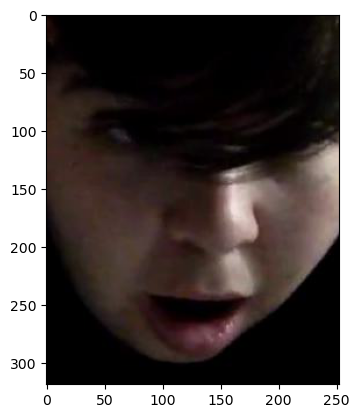

In [43]:
#from retinaface import RetinaFace
from PIL import Image
import matplotlib.pyplot as plt
import os
import gc
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm
  
# open method used to open different extension image file
im = Image.open("crop_frames/00000_frame_00023.jpg") 
  
# This method will show image in any image viewer 
plt.imshow(im) 

In [12]:
import os
import cv2

FRAME_PATH = "crop_frames"

# count number of image files in frames directory
total_frames = 0
for file_name in os.listdir(FRAME_PATH):
    if file_name.endswith(".jpg"):
        total_frames += 1

print(f"Total frames: {total_frames}")



Total frames: 499008


In [13]:
frames_folder = "frames"
crop_frames_folder = "crop_frames"
frame_names = sorted([filename for filename in os.listdir(frames_folder) if not os.path.exists(os.path.join(crop_frames_folder, filename))])

print(len(frame_names))

352


In [14]:
video_dict = {}
for i, frames in enumerate(frame_groups):
    video_name = frames[0].split('/')[1].split('_')[0]
    video_dict[video_name] = i
print(video_dict)

{'00000': 0, '00001': 1, '00002': 2, '00003': 3, '00004': 4, '00005': 5, '00006': 6, '00007': 7, '00008': 8, '00009': 9, '00010': 10, '00011': 11, '00012': 12, '00013': 13, '00014': 14, '00015': 15, '00016': 16, '00017': 17, '00018': 18, '00019': 19, '00020': 20, '00021': 21, '00022': 22, '00023': 23, '00024': 24, '00025': 25, '00026': 26, '00027': 27, '00028': 28, '00029': 29, '00030': 30, '00031': 31, '00032': 32, '00033': 33, '00034': 34, '00035': 35, '00036': 36, '00037': 37, '00038': 38, '00039': 39, '00040': 40, '00041': 41, '00042': 42, '00043': 43, '00044': 44, '00045': 45, '00046': 46, '00047': 47, '00048': 48, '00049': 49, '00050': 50, '00051': 51, '00052': 52, '00053': 53, '00054': 54, '00055': 55, '00056': 56, '00057': 57, '00058': 58, '00059': 59, '00060': 60, '00061': 61, '00062': 62, '00063': 63, '00064': 64, '00065': 65, '00066': 66, '00067': 67, '00068': 68, '00069': 69, '00070': 70, '00071': 71, '00072': 72, '00073': 73, '00074': 74, '00075': 75, '00076': 76, '00077':

In [15]:
uncrop_frame_paths = sorted([os.path.join("frames", filename) for filename in frame_names])
print(uncrop_frame_paths)

['frames/00590_frame_00000.jpg', 'frames/00590_frame_00001.jpg', 'frames/00590_frame_00002.jpg', 'frames/00590_frame_00003.jpg', 'frames/00590_frame_00004.jpg', 'frames/00590_frame_00005.jpg', 'frames/00590_frame_00006.jpg', 'frames/00590_frame_00007.jpg', 'frames/00590_frame_00008.jpg', 'frames/00590_frame_00009.jpg', 'frames/00590_frame_00010.jpg', 'frames/00590_frame_00011.jpg', 'frames/00590_frame_00012.jpg', 'frames/00590_frame_00013.jpg', 'frames/00590_frame_00014.jpg', 'frames/00590_frame_00015.jpg', 'frames/00590_frame_00016.jpg', 'frames/00590_frame_00017.jpg', 'frames/00590_frame_00018.jpg', 'frames/00590_frame_00019.jpg', 'frames/00590_frame_00020.jpg', 'frames/00590_frame_00021.jpg', 'frames/00590_frame_00022.jpg', 'frames/00590_frame_00023.jpg', 'frames/00590_frame_00024.jpg', 'frames/00590_frame_00025.jpg', 'frames/00590_frame_00026.jpg', 'frames/00590_frame_00027.jpg', 'frames/00590_frame_00028.jpg', 'frames/00590_frame_00029.jpg', 'frames/00590_frame_00030.jpg', 'frames

In [38]:
uncropped_videos = set([frame_name.split("_")[0] for frame_name in frame_names])
uncrop_video_groups = []

for video_name in sorted(uncropped_videos):
    if video_name in video_dict:
        print(f"Uncropped frames found for video {video_name}")
        video_index = video_dict[video_name]
        uncrop_video_groups.append(frame_groups[video_index])


Uncropped frames found for video 00590
Uncropped frames found for video 04805
Uncropped frames found for video 06613
Uncropped frames found for video 06763
Uncropped frames found for video 08756
Uncropped frames found for video 09297
Uncropped frames found for video 11987
Uncropped frames found for video 14278
Uncropped frames found for video 14599
Uncropped frames found for video 14620
Uncropped frames found for video 15554


In [39]:
for path in uncrop_frame_paths:
    file_name = path.split("/")[-1]  # extract the file name from the path
    dest_path = f"crop_frames/{file_name}"  # create the destination path
    shutil.copyfile(path, dest_path)  # copy the file to the destination folder

In [41]:
import os
import cv2

FRAME_PATH = "crop_frames"

# count number of image files in frames directory
total_frames = 0
for file_name in os.listdir(FRAME_PATH):
    if file_name.endswith(".jpg"):
        total_frames += 1

print(f"Total frames: {total_frames}")

#499360

Total frames: 499360


In [44]:
import os
import numpy as np
import cv2
from multiprocessing import Pool
import tqdm

CROP_FRAME_PATH = "crop_frames"
VIDEO_COUNT = len(os.listdir(CROP_FRAME_PATH)) // 32

def load_and_process_image(frame_path):
    img = cv2.imread(frame_path)
    img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_CUBIC)
    img = img[..., ::-1]  # Convert BGR to RGB
    return img

def process_video_chunk(args):
    index, chunk = args
    video_data = []
    for frame in chunk:
        frame_path = os.path.join(CROP_FRAME_PATH, frame)
        img = load_and_process_image(frame_path)
        video_data.append(img)
    return index, video_data

def build_dataset():
    dataset = [None] * VIDEO_COUNT
    all_frames = sorted(os.listdir(CROP_FRAME_PATH))
    
    with Pool() as pool:
        chunks = [(i, all_frames[i*32:(i+1)*32]) for i in range(VIDEO_COUNT)]
        for index, chunk_data in tqdm.tqdm(pool.imap_unordered(process_video_chunk, chunks), total=VIDEO_COUNT):
            dataset[index] = chunk_data
    
    return np.array(dataset)

train_dataset = build_dataset()
print(train_dataset.shape)




100%|█████████████████████████████████████| 15605/15605 [03:25<00:00, 75.91it/s]


(15605, 32, 224, 224, 3)


In [45]:
import numpy as np

size_in_bytes = train_dataset.nbytes
size_in_gb = size_in_bytes / (1024 ** 3)

print("Size of test_dataset in GB: {:.2f} GB".format(size_in_gb))

Size of test_dataset in GB: 70.01 GB


In [46]:
np.save("train_dataset.npy", train_dataset)

In [47]:
train_dataset.dtype

dtype('uint8')

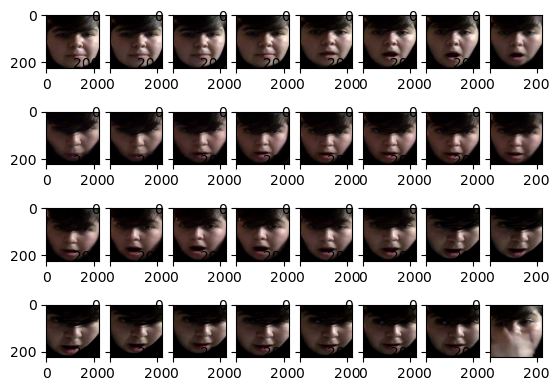

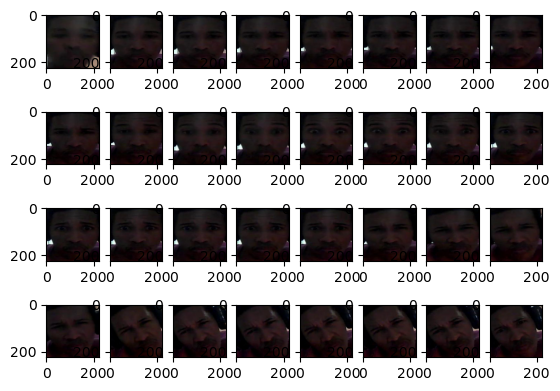

In [49]:
import matplotlib.pyplot as plt

# Display images from the first chunk
fig, axs = plt.subplots(4, 8)
for i, ax in enumerate(axs.flatten()):
    ax.imshow(train_dataset[0, i])
plt.show()

# Display images from the second chunk
fig, axs = plt.subplots(4, 8)
for i, ax in enumerate(axs.flatten()):
    ax.imshow(train_dataset[15604, i])
plt.show()

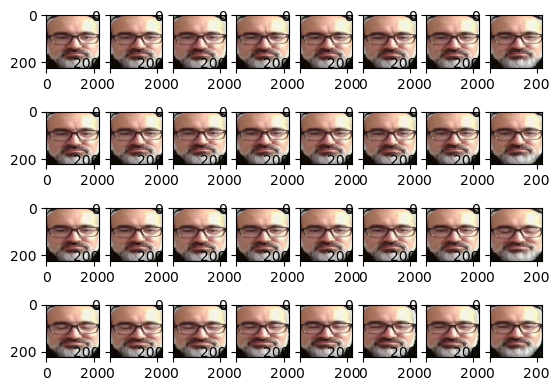

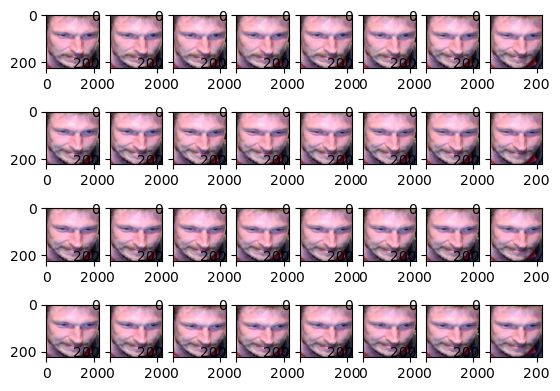

In [50]:
import matplotlib.pyplot as plt

# Display images from the first chunk
fig, axs = plt.subplots(4, 8)
for i, ax in enumerate(axs.flatten()):
    ax.imshow(train_dataset[10, i])
plt.show()

# Display images from the second chunk
fig, axs = plt.subplots(4, 8)
for i, ax in enumerate(axs.flatten()):
    ax.imshow(train_dataset[15, i])
plt.show()